# Week 1, Class 2: Mathematical Encoding of Medical Data
## Hands-on Lab: PyTorch Tensors and Medical Data Representation

**Course:** AI/ML in Medicine and Healthcare  
**Module:** Week 1 - Foundations  
**Lab Type:** Individual Work

---

## Learning Objectives
By the end of this lab, you will be able to:
1. Install and import PyTorch in Google Colab
2. Create and manipulate PyTorch tensors
3. Understand tensor dimensions and shapes
4. Convert medical data to tensor representations
5. Use GPU acceleration (when available)
6. Encode different medical data types as tensors

---

## Part 1: Installing and Importing PyTorch 🔥

Good news! PyTorch comes pre-installed in Google Colab!

In [1]:
# Import PyTorch
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"✓ PyTorch version: {torch.__version__}")
print(f"✓ CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"✓ GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠ Running on CPU (GPU not allocated)")
    print("  Tip: Runtime → Change runtime type → GPU")

✓ PyTorch version: 2.10.0+cu128
✓ CUDA available: True
✓ GPU: Tesla T4


---

## Part 2: Creating Your First Tensors 🎯

**Tensors** are the fundamental data structure in PyTorch (and deep learning).  
Think of them as multi-dimensional arrays.

In [2]:
# Scalar (0-D tensor) - a single number
patient_age = torch.tensor(45)
print("Scalar (0-D tensor):")
print(f"  Value: {patient_age}")
print(f"  Shape: {patient_age.shape}")
print(f"  Dimensions: {patient_age.ndim}\n")

# Vector (1-D tensor) - vital signs for one patient
vital_signs = torch.tensor([120.0, 80.0, 98.6, 72.0])  # [BP_sys, BP_dia, Temp, HR]
print("Vector (1-D tensor) - Vital signs:")
print(f"  Values: {vital_signs}")
print(f"  Shape: {vital_signs.shape}")
print(f"  Dimensions: {vital_signs.ndim}\n")

# Matrix (2-D tensor) - vital signs for multiple patients
patient_data = torch.tensor([
    [120.0, 80.0, 98.6, 72.0],  # Patient 1
    [130.0, 85.0, 99.1, 78.0],  # Patient 2
    [115.0, 75.0, 98.2, 68.0],  # Patient 3
])
print("Matrix (2-D tensor) - Multiple patients:")
print(f"  Shape: {patient_data.shape}  # (3 patients, 4 vital signs)")
print(f"  Dimensions: {patient_data.ndim}")
print(f"\n  Data:\n{patient_data}")

Scalar (0-D tensor):
  Value: 45
  Shape: torch.Size([])
  Dimensions: 0

Vector (1-D tensor) - Vital signs:
  Values: tensor([120.0000,  80.0000,  98.6000,  72.0000])
  Shape: torch.Size([4])
  Dimensions: 1

Matrix (2-D tensor) - Multiple patients:
  Shape: torch.Size([3, 4])  # (3 patients, 4 vital signs)
  Dimensions: 2

  Data:
tensor([[120.0000,  80.0000,  98.6000,  72.0000],
        [130.0000,  85.0000,  99.1000,  78.0000],
        [115.0000,  75.0000,  98.2000,  68.0000]])


### Understanding Tensor Shapes 📐

Shape is crucial in deep learning!

In [3]:
# 3-D tensor - medical images or time-series data
# Example: 5 patients, 10 time points, 4 vital signs
time_series_data = torch.randn(5, 10, 4)

print("3-D Tensor - Time series vital signs:")
print(f"  Shape: {time_series_data.shape}")
print(f"  Interpretation:")
print(f"    - Dimension 0 (size={time_series_data.shape[0]}): Number of patients")
print(f"    - Dimension 1 (size={time_series_data.shape[1]}): Time points")
print(f"    - Dimension 2 (size={time_series_data.shape[2]}): Vital sign features")

print(f"\n  Patient 1, All timepoints, HR (feature 3):")
print(f"    {time_series_data[0, :, 3]}")

3-D Tensor - Time series vital signs:
  Shape: torch.Size([5, 10, 4])
  Interpretation:
    - Dimension 0 (size=5): Number of patients
    - Dimension 1 (size=10): Time points
    - Dimension 2 (size=4): Vital sign features

  Patient 1, All timepoints, HR (feature 3):
    tensor([-0.5474,  0.9102,  1.7138,  0.1349,  0.4805, -0.5609,  1.4264, -1.6645,
        -0.5006,  0.7409])


---

## Part 3: Creating Tensors - Different Methods 🛠️

In [4]:
# Zeros (useful for initialization)
zeros = torch.zeros(3, 4)
print("Zeros tensor (3x4):")
print(zeros)

# Ones
ones = torch.ones(2, 3)
print("\nOnes tensor (2x3):")
print(ones)

# Random values (uniform distribution [0, 1))
random_uniform = torch.rand(3, 3)
print("\nRandom uniform [0,1) (3x3):")
print(random_uniform)

# Random values (normal distribution, mean=0, std=1)
random_normal = torch.randn(3, 3)
print("\nRandom normal N(0,1) (3x3):")
print(random_normal)

# From a range
range_tensor = torch.arange(0, 10, 2)  # start, end, step
print("\nRange tensor [0, 10) step 2:")
print(range_tensor)

Zeros tensor (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones tensor (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random uniform [0,1) (3x3):
tensor([[0.5356, 0.8305, 0.8849],
        [0.2283, 0.2538, 0.4050],
        [0.0358, 0.6482, 0.3950]])

Random normal N(0,1) (3x3):
tensor([[ 0.5977,  0.7208,  2.4944],
        [-1.4422, -1.0904, -0.5840],
        [ 0.7650,  0.5336,  0.9491]])

Range tensor [0, 10) step 2:
tensor([0, 2, 4, 6, 8])


---

## Part 4: Converting Between NumPy and PyTorch 🔄

In [5]:
# NumPy to PyTorch
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
torch_tensor = torch.from_numpy(numpy_array)

print("NumPy array:")
print(numpy_array)
print(f"Type: {type(numpy_array)}")

print("\nConverted to PyTorch tensor:")
print(torch_tensor)
print(f"Type: {type(torch_tensor)}")

# PyTorch to NumPy
back_to_numpy = torch_tensor.numpy()
print("\nBack to NumPy:")
print(back_to_numpy)
print(f"Type: {type(back_to_numpy)}")

print("\n⚠ Note: They share memory! Changing one affects the other.")

NumPy array:
[[1 2 3]
 [4 5 6]]
Type: <class 'numpy.ndarray'>

Converted to PyTorch tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Type: <class 'torch.Tensor'>

Back to NumPy:
[[1 2 3]
 [4 5 6]]
Type: <class 'numpy.ndarray'>

⚠ Note: They share memory! Changing one affects the other.


---

## Part 5: Tensor Operations 🧮

These operations are the building blocks of neural networks!

In [6]:
# Create two tensors
a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
b = torch.tensor([[5.0, 6.0], [7.0, 8.0]])

print("Tensor a:")
print(a)
print("\nTensor b:")
print(b)

# Element-wise operations
print("\n--- Element-wise Operations ---")
print("\nAddition (a + b):")
print(a + b)

print("\nMultiplication (a * b):")
print(a * b)

print("\nDivision (a / b):")
print(a / b)

# Matrix multiplication
print("\n--- Matrix Operations ---")
print("\nMatrix multiplication (a @ b):")
print(a @ b)

# Aggregation operations
print("\n--- Aggregations ---")
print(f"Sum: {a.sum()}")
print(f"Mean: {a.mean()}")
print(f"Max: {a.max()}")
print(f"Min: {a.min()}")

# Along specific dimensions
print(f"\nSum along rows (dim=0): {a.sum(dim=0)}")
print(f"Sum along columns (dim=1): {a.sum(dim=1)}")

Tensor a:
tensor([[1., 2.],
        [3., 4.]])

Tensor b:
tensor([[5., 6.],
        [7., 8.]])

--- Element-wise Operations ---

Addition (a + b):
tensor([[ 6.,  8.],
        [10., 12.]])

Multiplication (a * b):
tensor([[ 5., 12.],
        [21., 32.]])

Division (a / b):
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

--- Matrix Operations ---

Matrix multiplication (a @ b):
tensor([[19., 22.],
        [43., 50.]])

--- Aggregations ---
Sum: 10.0
Mean: 2.5
Max: 4.0
Min: 1.0

Sum along rows (dim=0): tensor([4., 6.])
Sum along columns (dim=1): tensor([3., 7.])


---

## Part 6: Encoding Medical Data as Tensors 🏥

Let's encode different types of medical data!

### 6.1 Numerical Data - Vital Signs

In [7]:
# Patient vital signs
patient_vitals = {
    'heart_rate': 72,        # bpm
    'systolic_bp': 120,      # mmHg
    'diastolic_bp': 80,      # mmHg
    'temperature': 98.6,     # °F
    'respiratory_rate': 16,  # breaths/min
    'oxygen_saturation': 98  # %
}

# Convert to tensor
vitals_tensor = torch.tensor(list(patient_vitals.values()), dtype=torch.float32)

print("Patient Vital Signs as Tensor:")
print(vitals_tensor)
print(f"Shape: {vitals_tensor.shape}")
print(f"\nFeature names: {list(patient_vitals.keys())}")

Patient Vital Signs as Tensor:
tensor([ 72.0000, 120.0000,  80.0000,  98.6000,  16.0000,  98.0000])
Shape: torch.Size([6])

Feature names: ['heart_rate', 'systolic_bp', 'diastolic_bp', 'temperature', 'respiratory_rate', 'oxygen_saturation']


### 6.2 Categorical Data - One-Hot Encoding

In [8]:
# Blood type: A, B, AB, O
blood_types = ['A', 'B', 'AB', 'O']
patient_blood_type = 'B'

# One-hot encode
blood_type_idx = blood_types.index(patient_blood_type)
one_hot = torch.zeros(len(blood_types))
one_hot[blood_type_idx] = 1

print("Blood Type One-Hot Encoding:")
print(f"Patient has blood type: {patient_blood_type}")
print(f"Categories: {blood_types}")
print(f"One-hot vector: {one_hot}")
print(f"\nInterpretation: [A, B, AB, O] = {one_hot.tolist()}")

# PyTorch's built-in one-hot
one_hot_builtin = torch.nn.functional.one_hot(torch.tensor(blood_type_idx), num_classes=4)
print(f"\nUsing PyTorch built-in: {one_hot_builtin}")

Blood Type One-Hot Encoding:
Patient has blood type: B
Categories: ['A', 'B', 'AB', 'O']
One-hot vector: tensor([0., 1., 0., 0.])

Interpretation: [A, B, AB, O] = [0.0, 1.0, 0.0, 0.0]

Using PyTorch built-in: tensor([0, 1, 0, 0])


### 6.3 Time Series Data - ECG Signal

ECG Signal Tensor:
  Shape: torch.Size([100])
  Length: 100 time points
  First 10 values: tensor([-0.0817,  0.2434,  0.2528,  0.5494,  0.5482,  0.6522,  0.7556,  0.6475,
         0.7847,  0.7830])


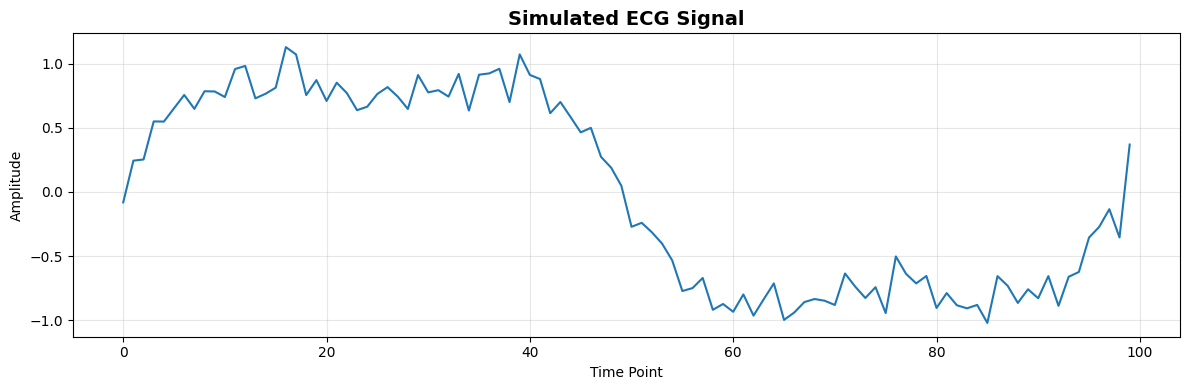

In [9]:
# Simulate a simple ECG signal (heartbeat pattern)
time_points = 100
t = torch.linspace(0, 2 * np.pi, time_points)

# Create synthetic ECG (simplified)
ecg_signal = torch.sin(t) + 0.3 * torch.sin(3 * t) + 0.1 * torch.randn(time_points)

print(f"ECG Signal Tensor:")
print(f"  Shape: {ecg_signal.shape}")
print(f"  Length: {len(ecg_signal)} time points")
print(f"  First 10 values: {ecg_signal[:10]}")

# Visualize
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal.numpy(), linewidth=1.5)
plt.title('Simulated ECG Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time Point')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 6.4 Image Data - Medical Image Representation

Medical Image Tensor:
  Shape: torch.Size([28, 28])  # (height, width)
  Data type: torch.float32
  Min pixel: -0.152
  Max pixel: 1.065


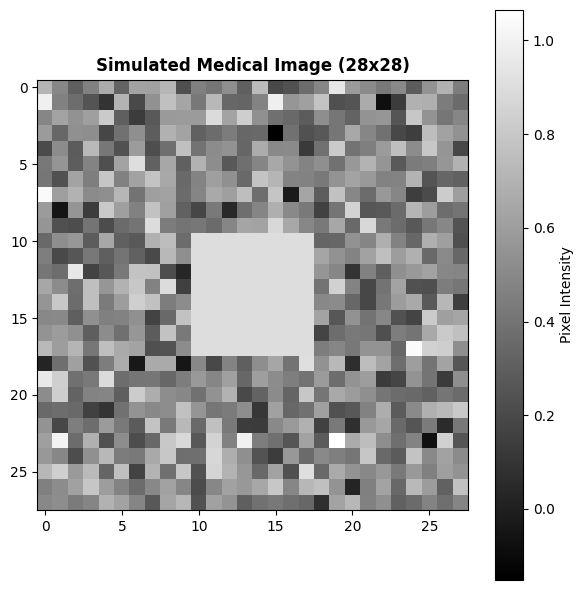


RGB Image Shape: torch.Size([3, 28, 28])  # (C, H, W) format


In [10]:
# Simulate a small grayscale medical image (e.g., X-ray patch)
# Real images would be much larger (e.g., 512x512 or 1024x1024)
image_height = 28
image_width = 28

# Create a synthetic image with a bright spot (simulating a lesion)
medical_image = torch.randn(image_height, image_width) * 0.2 + 0.5

# Add a "lesion" (bright spot)
medical_image[10:18, 10:18] = 0.9

print("Medical Image Tensor:")
print(f"  Shape: {medical_image.shape}  # (height, width)")
print(f"  Data type: {medical_image.dtype}")
print(f"  Min pixel: {medical_image.min():.3f}")
print(f"  Max pixel: {medical_image.max():.3f}")

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(medical_image.numpy(), cmap='gray')
plt.title('Simulated Medical Image (28x28)', fontsize=12, fontweight='bold')
plt.colorbar(label='Pixel Intensity')
plt.tight_layout()
plt.show()

# For color images (RGB), we'd have 3 channels
rgb_image = torch.randn(3, image_height, image_width)  # (channels, height, width)
print(f"\nRGB Image Shape: {rgb_image.shape}  # (C, H, W) format")

---

## Part 7: GPU Acceleration 🚀

One of PyTorch's superpowers: easy GPU acceleration!

In [11]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create tensor and move to GPU
cpu_tensor = torch.randn(1000, 1000)
print(f"\nCPU Tensor device: {cpu_tensor.device}")

# Move to GPU (if available)
gpu_tensor = cpu_tensor.to(device)
print(f"GPU Tensor device: {gpu_tensor.device}")

# Perform operation on GPU
result = gpu_tensor @ gpu_tensor  # Matrix multiplication
print(f"Result device: {result.device}")

# Move back to CPU for numpy conversion
cpu_result = result.cpu()
print(f"\nResult shape: {cpu_result.shape}")
print(f"Result device (after .cpu()): {cpu_result.device}")

Using device: cuda

CPU Tensor device: cpu
GPU Tensor device: cuda:0
Result device: cuda:0

Result shape: torch.Size([1000, 1000])
Result device (after .cpu()): cpu


### GPU vs CPU Speed Comparison

In [12]:
import time

size = 5000

# CPU timing
cpu_a = torch.randn(size, size)
cpu_b = torch.randn(size, size)

start_time = time.time()
cpu_result = cpu_a @ cpu_b
cpu_time = time.time() - start_time

print(f"CPU Time: {cpu_time:.4f} seconds")

# GPU timing (if available)
if torch.cuda.is_available():
    gpu_a = cpu_a.to('cuda')
    gpu_b = cpu_b.to('cuda')

    # Warm up GPU
    _ = gpu_a @ gpu_b

    start_time = time.time()
    gpu_result = gpu_a @ gpu_b
    torch.cuda.synchronize()  # Wait for GPU to finish
    gpu_time = time.time() - start_time

    print(f"GPU Time: {gpu_time:.4f} seconds")
    print(f"\nSpeedup: {cpu_time/gpu_time:.2f}x faster on GPU!")
else:
    print("\nGPU not available. Enable GPU runtime for comparison.")

CPU Time: 3.1308 seconds
GPU Time: 0.1753 seconds

Speedup: 17.86x faster on GPU!


---

## Part 8: Reshaping and Broadcasting 🔀

In [13]:
# Reshaping
x = torch.arange(12)
print("Original tensor:")
print(x)
print(f"Shape: {x.shape}")

# Reshape to 2D
x_2d = x.view(3, 4)
print("\nReshaped to (3, 4):")
print(x_2d)

# Reshape to 3D
x_3d = x.view(2, 2, 3)
print("\nReshaped to (2, 2, 3):")
print(x_3d)

# Broadcasting
print("\n--- Broadcasting ---")
a = torch.tensor([[1], [2], [3]])  # (3, 1)
b = torch.tensor([10, 20, 30])     # (3,)

print(f"a shape: {a.shape}")
print(f"b shape: {b.shape}")

c = a + b  # Broadcasting!
print(f"\nResult shape: {c.shape}")
print("Result:")
print(c)

print("\n💡 Broadcasting automatically expands tensors to compatible shapes!")

Original tensor:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

Reshaped to (3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshaped to (2, 2, 3):
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])

--- Broadcasting ---
a shape: torch.Size([3, 1])
b shape: torch.Size([3])

Result shape: torch.Size([3, 3])
Result:
tensor([[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]])

💡 Broadcasting automatically expands tensors to compatible shapes!


---

## Part 9: Exercise - Encode Patient Data 📋

**Your turn!** Complete this exercise.

In [17]:
# Patient information
patient = {
    'age': 65,
    'heart_rate': 78,
    'systolic_bp': 145,
    'diastolic_bp': 92,
    'temperature': 99.2,
    'gender': 'M',  # M or F
    'diabetes': True,
}

# TODO: Create tensors for:
# 1. Numerical features (age, heart_rate, BP, temperature)
# 2. Gender as one-hot encoded tensor (M=1, F=0)
# 3. Diabetes as binary tensor (True=1, False=0)

numerical_features = torch.tensor([
    patient['age'],
    patient['heart_rate'],
    patient['systolic_bp'],
    patient['diastolic_bp'],
    patient['temperature']
], dtype=torch.float32)


map = {'M': [1.0, 0.0], 'F': [0.0, 1.0]}
gender = torch.tensor(map[patient['gender']])
diabetes = torch.tensor([1.0 if patient['diabetes'] else 0.0])

patient_tensor = torch.cat([numerical_features, gender, diabetes])


# # SOLUTION:
# # Numerical features
# numerical_features = torch.tensor([
#     patient['age'],
#     patient['heart_rate'],
#     patient['systolic_bp'],
#     patient['diastolic_bp'],
#     patient['temperature']
# ], dtype=torch.float32)

# # Gender (one-hot: [Male, Female])
# gender_encoded = torch.tensor([1.0, 0.0] if patient['gender'] == 'M' else [0.0, 1.0])

# # Diabetes (binary)
# diabetes_encoded = torch.tensor([1.0 if patient['diabetes'] else 0.0])

# # Combine all features
# patient_tensor = torch.cat([numerical_features, gender_encoded, diabetes_encoded])

print("Patient Encoded as Tensor:")
print(patient_tensor)
print(f"\nShape: {patient_tensor.shape}")
print(f"Total features: {patient_tensor.shape[0]}")
print("\nFeature breakdown:")
print("  [0-4]: Numerical vitals")
print("  [5-6]: Gender (M/F one-hot)")
print("  [7]:   Diabetes status")

Patient Encoded as Tensor:
tensor([ 65.0000,  78.0000, 145.0000,  92.0000,  99.2000,   1.0000,   0.0000,
          1.0000])

Shape: torch.Size([8])
Total features: 8

Feature breakdown:
  [0-4]: Numerical vitals
  [5-6]: Gender (M/F one-hot)
  [7]:   Diabetes status


---

## Part 10: Real-World Example - Batch Processing 🏭

In [18]:
# Multiple patients - batch processing
num_patients = 10
num_features = 8

# Generate random patient data (in practice, this comes from a dataset)
patient_batch = torch.randn(num_patients, num_features)

print(f"Batch of patients:")
print(f"  Shape: {patient_batch.shape}")
print(f"  Interpretation: {num_patients} patients, {num_features} features each")

# Normalize features (common preprocessing step)
mean = patient_batch.mean(dim=0, keepdim=True)
std = patient_batch.std(dim=0, keepdim=True)
normalized_batch = (patient_batch - mean) / (std + 1e-8)  # Add epsilon to avoid division by zero

print(f"\nNormalized batch:")
print(f"  Mean per feature: {normalized_batch.mean(dim=0)}")
print(f"  Std per feature: {normalized_batch.std(dim=0)}")
print("\n💡 Normalization is crucial for training neural networks!")

Batch of patients:
  Shape: torch.Size([10, 8])
  Interpretation: 10 patients, 8 features each

Normalized batch:
  Mean per feature: tensor([-2.3842e-08,  2.3842e-08,  0.0000e+00,  0.0000e+00,  1.1921e-08,
        -4.7684e-08,  8.3447e-08, -2.9802e-08])
  Std per feature: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

💡 Normalization is crucial for training neural networks!


---

## 🎓 Wrap-Up

### What You've Learned:
✓ Created and manipulated PyTorch tensors  
✓ Understood tensor shapes and dimensions  
✓ Converted between NumPy and PyTorch  
✓ Performed tensor operations  
✓ Encoded medical data (numerical, categorical, time-series, images)  
✓ Used GPU acceleration  
✓ Reshaped and broadcasted tensors  
✓ Processed batches of patient data  

### Key Takeaways:
1. **Tensors are fundamental** - All neural network data flows through tensors
2. **Shape matters** - Understanding dimensions is crucial
3. **GPU is powerful** - Can provide massive speedups
4. **Data encoding is essential** - Medical data must be converted to numerical tensors

### Next Steps:
- Save this notebook
- Form your project groups (Class 3)
- Review Chapter 2 of the textbook
- Experiment with different data types

---

## 🏠 Homework Challenge

1. Create a 3D tensor representing 5 patients, 20 time points, 6 vital signs
2. Extract patient 3's heart rate over all time points
3. Calculate the mean heart rate for each patient
4. Normalize the entire dataset
5. Move everything to GPU and time the operations

---

**Excellent work! You're now ready for Week 2! 🎉**

In [26]:
data = torch.randn(5, 20, 6)

print(data[3, :, 3])

print(data[:, :, 3].mean(dim=1))


tensor([ 0.0244,  0.2224,  0.1506,  0.3748,  0.0413, -0.9698, -0.5383, -1.2395,
        -0.5528, -0.2704, -0.3772, -0.4467, -0.4119,  0.4002, -0.3430,  1.0091,
         0.2964,  2.0306, -0.0771, -0.9648])
tensor([ 0.3200, -0.0472,  0.3080, -0.0821,  0.0010])
